# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Notes
- we used the GPT2 model
- we used the GPT2 tokenizer with this settings 
  - use_fast=True
  - add_prefix_space=False
- in this case we used only the tokens that are digits [0-9] for GPT2 and ASMR
- using the floatingPointPartitioner
- floating points of one digit, ie: .1, .2, .3, .4, .5, .6, .7, .8, .9

# Loading data of samples of one digit length

In [5]:
#this samples had the prompt tokenizer.decode(tokenizer.bos_token_id)
outlines_data = pd.read_csv('../../csv/outlines_10k_length1.csv')
repeated_values_outlines = outlines_data['floating-point'].value_counts()
print(repeated_values_outlines)

floating-point
0.5    2913
0.1    1388
0.6     817
0.2     792
0.0     780
0.3     720
0.7     698
0.4     672
0.9     639
0.8     581
Name: count, dtype: int64


In [6]:
#this samples were generated using the FloatingPointPartitioner
asmr_data = pd.read_csv('../../csv/asmr_10k_length1.csv')
repeated_values_asmr = asmr_data['floating-point'].value_counts()
print(repeated_values_asmr)

floating-point
0.5    3012
0.1    1383
0.6     796
0.7     769
0.0     767
0.2     744
0.3     682
0.9     664
0.4     629
0.8     554
Name: count, dtype: int64


In [7]:
#this samples had the prompt tokenizer.decode(tokenizer.bos_token_id) + "."
llm_data = pd.read_csv('../../csv/llm_10k_length1.csv')
repeated_values_llm = llm_data['floating-point'].value_counts()
print(repeated_values_llm)

floating-point
0.5    2985
0.1    1388
0.6     831
0.2     760
0.3     750
0.0     749
0.7     668
0.4     665
0.9     640
0.8     564
Name: count, dtype: int64


# Plots

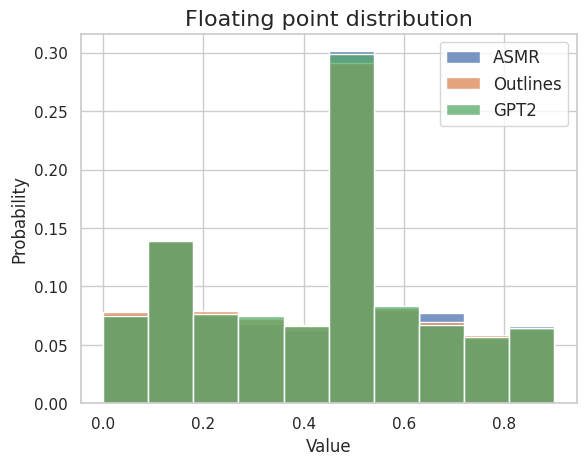

In [8]:
sns.set(style="whitegrid")

sns.histplot(asmr_data['floating-point'], bins=10, stat='probability', label='ASMR')
sns.histplot(outlines_data['floating-point'], bins=10, stat='probability', label='Outlines')
sns.histplot(llm_data['floating-point'], bins=10, stat='probability', label='GPT2')


plt.title('Floating point distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend(fontsize=12)

plt.show()


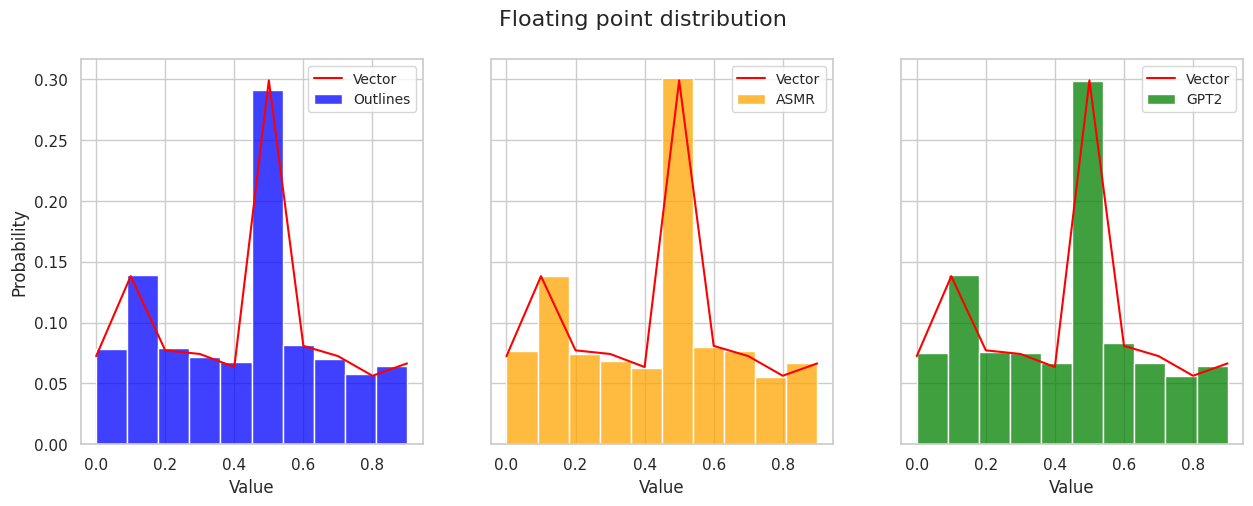

In [10]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(outlines_data['floating-point'], bins=10, stat='probability', label='Outlines', ax=axs[0], color = 'blue')
sns.histplot(asmr_data['floating-point'], bins=10, stat='probability', label='ASMR', ax=axs[1], color='orange')
sns.histplot(llm_data['floating-point'], bins=10, stat='probability', label='GPT2', ax=axs[2], color='green')

vector = [0.07235368508406921, 0.1380868579365871, 0.07713241182190415, 0.07416619932308573, 0.06344642027043924, 0.29891086356400415, 0.08080755356832184, 0.07243128692171712, 0.05626469225328908, 0.0664000292565824]
for i, ax in enumerate(axs):
    ax.plot([i/10 for i in range(10)], vector, color='red', label='Vector')

fig.suptitle('Floating point distribution', fontsize=16)
for ax in axs:
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)
    ax.legend(fontsize=10)

plt.show()
